# Perceptron
The Perceptron is trained to recieve inputs in the form of input nodes and transfers the appropriate

In [22]:
import torch

#importing data set directly from sklearn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn


In [42]:
n_pts = 100 # number of data points
centers = [[-0.5, 0.5], [0.5, -0.5]]
seed = 123
x, y = datasets.make_blobs(n_samples=n_pts, random_state=seed, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(x)

# if y_data = torch.Tensor(y), you will have ValueError: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
# So you may want to reshape dimension
y_data = torch.Tensor(y.reshape(100,1))

# print(x) #coordinate
# print(y) #labels
# print(x_data)

Plots

[-0.13715792 -0.60224775  0.0063745  -0.87433355 -0.6340043  -0.48180397
  0.19748489 -0.62590326 -0.31262435 -0.1085056   0.09825765 -0.36456438
  0.33484534 -0.66134642 -0.42758595 -0.09837844  0.45694611 -0.12901503
 -0.49886163 -0.03991778 -0.20505257 -0.97932046 -0.79298479 -1.00155227
 -0.83500669  0.164381    0.00209495  0.38237203 -0.14371744 -0.34823976
 -0.77155446 -1.01763413 -0.82214661 -0.03511838 -0.93382716 -0.3868086
 -1.20861324 -0.48812671 -0.67759278 -0.3742912  -0.65635992 -0.80908349
  0.06691962 -0.55602749 -0.7314401  -0.93425224 -1.4706717   0.09655585
 -0.85181454 -1.34924014]
[-0.07147228 -0.61943564  0.15330384  0.97033162  0.91244578  0.40676318
  0.18077491  0.06563904  0.16753801  1.39525734  0.92775707  0.4952678
  0.56577649  0.44958817  0.97114478  0.65447456  0.66516486  0.43054573
  0.77528908 -0.00694082  1.09629281  0.57980963  0.01499075  0.2448994
 -0.1423851   0.82292327  0.22445241  1.37471444  1.20195447  0.34832943
  0.46211641  0.08448472 -0.

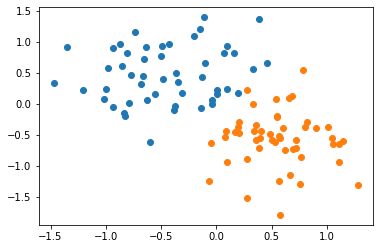

In [43]:
print(x[y==0, 0]) # get all the zeros in y for x 
print(x[y==0, 1])
# plt.scatter(x[y==0, 0], x[y==0, 1])
# plt.scatter(x[y==1, 0], x[y==1, 1])


def scatter_plot():
    plt.scatter(x[y==0, 0], x[y==0, 1])
    plt.scatter(x[y==1, 0], x[y==1, 1])
    
scatter_plot()

# Initialize linear model


In [60]:
class Model(nn.Module): # inherit from nn.module
    def __init__(self, input_size, output_size): # Constructor
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # forward - prediction section
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        return 0

Use linear model

In [61]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


Extract the model parameter

In [62]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True) Parameter containing:
tensor([0.1939], requires_grad=True)


As shown above w is 2d tensor.

In [63]:
w1, w2 = w.view(2)
b1 = b[0]
print(w1, w2, b1)
print(w1.item(), w2.item(), b1.item())

def get_params():
    return (w1.item(), w2.item(), b1.item())

tensor(0.1622, grad_fn=<UnbindBackward>) tensor(-0.1683, grad_fn=<UnbindBackward>) tensor(0.1939, grad_fn=<SelectBackward>)
0.1622033268213272 -0.1682732254266739 0.1939089596271515


In [64]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    # 0 = w1x2 + w2x2 + b
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1, x2, 'r')
    scatter_plot()

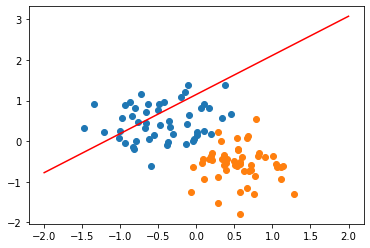

In [65]:
plot_fit('Iinitial Model')

In [66]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [67]:
epochs = 10000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i, "loss: ", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad() # Computing any gradient, you must first set gradient zero
    loss.backward()
    optimizer.step()
    
    

epoch:  0 loss:  0.6185115575790405
epoch:  1 loss:  0.617464005947113
epoch:  2 loss:  0.6164200305938721
epoch:  3 loss:  0.6153795123100281
epoch:  4 loss:  0.6143423318862915
epoch:  5 loss:  0.6133086681365967
epoch:  6 loss:  0.612278401851654
epoch:  7 loss:  0.6112514734268188
epoch:  8 loss:  0.6102280020713806
epoch:  9 loss:  0.6092078685760498
epoch:  10 loss:  0.6081911325454712
epoch:  11 loss:  0.607177734375
epoch:  12 loss:  0.6061676740646362
epoch:  13 loss:  0.6051609516143799
epoch:  14 loss:  0.604157567024231
epoch:  15 loss:  0.6031573414802551
epoch:  16 loss:  0.6021605730056763
epoch:  17 loss:  0.6011670231819153
epoch:  18 loss:  0.6001767516136169
epoch:  19 loss:  0.5991896986961365
epoch:  20 loss:  0.5982059240341187
epoch:  21 loss:  0.5972253680229187
epoch:  22 loss:  0.5962480306625366
epoch:  23 loss:  0.5952739119529724
epoch:  24 loss:  0.5943029522895813
epoch:  25 loss:  0.5933352112770081
epoch:  26 loss:  0.5923706293106079
epoch:  27 loss:  

epoch:  406 loss:  0.37392741441726685
epoch:  407 loss:  0.3735944628715515
epoch:  408 loss:  0.37326231598854065
epoch:  409 loss:  0.3729309141635895
epoch:  410 loss:  0.372600257396698
epoch:  411 loss:  0.3722703456878662
epoch:  412 loss:  0.3719411790370941
epoch:  413 loss:  0.3716128170490265
epoch:  414 loss:  0.3712851405143738
epoch:  415 loss:  0.37095820903778076
epoch:  416 loss:  0.3706320524215698
epoch:  417 loss:  0.3703065812587738
epoch:  418 loss:  0.36998188495635986
epoch:  419 loss:  0.3696579039096832
epoch:  420 loss:  0.3693346083164215
epoch:  421 loss:  0.36901214718818665
epoch:  422 loss:  0.3686903417110443
epoch:  423 loss:  0.3683692514896393
epoch:  424 loss:  0.36804884672164917
epoch:  425 loss:  0.3677293062210083
epoch:  426 loss:  0.3674103021621704
epoch:  427 loss:  0.3670920431613922
epoch:  428 loss:  0.3667745888233185
epoch:  429 loss:  0.36645781993865967
epoch:  430 loss:  0.36614173650741577
epoch:  431 loss:  0.3658263385295868
epoch

epoch:  859 loss:  0.27451249957084656
epoch:  860 loss:  0.2743678390979767
epoch:  861 loss:  0.2742234170436859
epoch:  862 loss:  0.27407917380332947
epoch:  863 loss:  0.2739351689815521
epoch:  864 loss:  0.2737914025783539
epoch:  865 loss:  0.27364781498908997
epoch:  866 loss:  0.27350449562072754
epoch:  867 loss:  0.27336132526397705
epoch:  868 loss:  0.27321839332580566
epoch:  869 loss:  0.273075670003891
epoch:  870 loss:  0.27293312549591064
epoch:  871 loss:  0.2727908194065094
epoch:  872 loss:  0.27264872193336487
epoch:  873 loss:  0.27250686287879944
epoch:  874 loss:  0.27236518263816833
epoch:  875 loss:  0.27222371101379395
epoch:  876 loss:  0.2720824182033539
epoch:  877 loss:  0.2719413638114929
epoch:  878 loss:  0.27180051803588867
epoch:  879 loss:  0.27165988087654114
epoch:  880 loss:  0.27151942253112793
epoch:  881 loss:  0.2713792324066162
epoch:  882 loss:  0.27123916149139404
epoch:  883 loss:  0.27109938859939575
epoch:  884 loss:  0.27095973491668

epoch:  1318 loss:  0.22482606768608093
epoch:  1319 loss:  0.22474484145641327
epoch:  1320 loss:  0.2246636599302292
epoch:  1321 loss:  0.22458261251449585
epoch:  1322 loss:  0.2245016247034073
epoch:  1323 loss:  0.2244206964969635
epoch:  1324 loss:  0.22433987259864807
epoch:  1325 loss:  0.2242591679096222
epoch:  1326 loss:  0.22417853772640228
epoch:  1327 loss:  0.22409795224666595
epoch:  1328 loss:  0.22401750087738037
epoch:  1329 loss:  0.22393712401390076
epoch:  1330 loss:  0.2238568365573883
epoch:  1331 loss:  0.22377660870552063
epoch:  1332 loss:  0.2236964851617813
epoch:  1333 loss:  0.22361645102500916
epoch:  1334 loss:  0.22353649139404297
epoch:  1335 loss:  0.22345659136772156
epoch:  1336 loss:  0.2233767956495285
epoch:  1337 loss:  0.2232971042394638
epoch:  1338 loss:  0.22321748733520508
epoch:  1339 loss:  0.22313794493675232
epoch:  1340 loss:  0.22305849194526672
epoch:  1341 loss:  0.2229791134595871
epoch:  1342 loss:  0.22289982438087463
epoch:  1

epoch:  1778 loss:  0.19472359120845795
epoch:  1779 loss:  0.19467076659202576
epoch:  1780 loss:  0.19461800158023834
epoch:  1781 loss:  0.19456522166728973
epoch:  1782 loss:  0.1945125162601471
epoch:  1783 loss:  0.19445987045764923
epoch:  1784 loss:  0.19440725445747375
epoch:  1785 loss:  0.19435468316078186
epoch:  1786 loss:  0.19430217146873474
epoch:  1787 loss:  0.19424968957901
epoch:  1788 loss:  0.19419723749160767
epoch:  1789 loss:  0.1941448450088501
epoch:  1790 loss:  0.1940924972295761
epoch:  1791 loss:  0.1940401792526245
epoch:  1792 loss:  0.1939879208803177
epoch:  1793 loss:  0.19393569231033325
epoch:  1794 loss:  0.1938834935426712
epoch:  1795 loss:  0.19383136928081512
epoch:  1796 loss:  0.19377924501895905
epoch:  1797 loss:  0.19372719526290894
epoch:  1798 loss:  0.1936751902103424
epoch:  1799 loss:  0.19362320005893707
epoch:  1800 loss:  0.1935712844133377
epoch:  1801 loss:  0.19351939857006073
epoch:  1802 loss:  0.19346755743026733
epoch:  180

epoch:  2247 loss:  0.1739015430212021
epoch:  2248 loss:  0.17386415600776672
epoch:  2249 loss:  0.17382681369781494
epoch:  2250 loss:  0.17378948628902435
epoch:  2251 loss:  0.17375217378139496
epoch:  2252 loss:  0.17371492087841034
epoch:  2253 loss:  0.17367765307426453
epoch:  2254 loss:  0.1736404448747635
epoch:  2255 loss:  0.17360323667526245
epoch:  2256 loss:  0.1735660582780838
epoch:  2257 loss:  0.17352892458438873
epoch:  2258 loss:  0.17349177598953247
epoch:  2259 loss:  0.1734546720981598
epoch:  2260 loss:  0.1734175831079483
epoch:  2261 loss:  0.1733805239200592
epoch:  2262 loss:  0.1733435094356537
epoch:  2263 loss:  0.17330650985240936
epoch:  2264 loss:  0.17326952517032623
epoch:  2265 loss:  0.1732325702905655
epoch:  2266 loss:  0.17319563031196594
epoch:  2267 loss:  0.17315872013568878
epoch:  2268 loss:  0.173121839761734
epoch:  2269 loss:  0.17308500409126282
epoch:  2270 loss:  0.17304815351963043
epoch:  2271 loss:  0.17301134765148163
epoch:  22

epoch:  2694 loss:  0.15932589769363403
epoch:  2695 loss:  0.1592974215745926
epoch:  2696 loss:  0.15926894545555115
epoch:  2697 loss:  0.1592405140399933
epoch:  2698 loss:  0.15921206772327423
epoch:  2699 loss:  0.15918366611003876
epoch:  2700 loss:  0.1591552495956421
epoch:  2701 loss:  0.1591268926858902
epoch:  2702 loss:  0.1590985208749771
epoch:  2703 loss:  0.15907013416290283
epoch:  2704 loss:  0.15904182195663452
epoch:  2705 loss:  0.15901349484920502
epoch:  2706 loss:  0.1589851826429367
epoch:  2707 loss:  0.1589568853378296
epoch:  2708 loss:  0.15892861783504486
epoch:  2709 loss:  0.15890038013458252
epoch:  2710 loss:  0.15887212753295898
epoch:  2711 loss:  0.15884390473365784
epoch:  2712 loss:  0.1588156819343567
epoch:  2713 loss:  0.15878747403621674
epoch:  2714 loss:  0.15875932574272156
epoch:  2715 loss:  0.158731147646904
epoch:  2716 loss:  0.1587029993534088
epoch:  2717 loss:  0.15867486596107483
epoch:  2718 loss:  0.15864674746990204
epoch:  271

epoch:  3159 loss:  0.14758513867855072
epoch:  3160 loss:  0.14756271243095398
epoch:  3161 loss:  0.14754033088684082
epoch:  3162 loss:  0.14751794934272766
epoch:  3163 loss:  0.1474955826997757
epoch:  3164 loss:  0.14747321605682373
epoch:  3165 loss:  0.14745086431503296
epoch:  3166 loss:  0.14742852747440338
epoch:  3167 loss:  0.1474061906337738
epoch:  3168 loss:  0.1473838835954666
epoch:  3169 loss:  0.14736157655715942
epoch:  3170 loss:  0.14733925461769104
epoch:  3171 loss:  0.14731699228286743
epoch:  3172 loss:  0.14729471504688263
epoch:  3173 loss:  0.14727243781089783
epoch:  3174 loss:  0.14725017547607422
epoch:  3175 loss:  0.147227942943573
epoch:  3176 loss:  0.14720569550991058
epoch:  3177 loss:  0.14718346297740936
epoch:  3178 loss:  0.14716126024723053
epoch:  3179 loss:  0.1471390575170517
epoch:  3180 loss:  0.14711688458919525
epoch:  3181 loss:  0.14709466695785522
epoch:  3182 loss:  0.14707250893115997
epoch:  3183 loss:  0.14705035090446472
epoch:

epoch:  3612 loss:  0.13841566443443298
epoch:  3613 loss:  0.13839736580848694
epoch:  3614 loss:  0.1383790671825409
epoch:  3615 loss:  0.13836078345775604
epoch:  3616 loss:  0.13834251463413239
epoch:  3617 loss:  0.13832426071166992
epoch:  3618 loss:  0.13830599188804626
epoch:  3619 loss:  0.1382877230644226
epoch:  3620 loss:  0.13826948404312134
epoch:  3621 loss:  0.13825125992298126
epoch:  3622 loss:  0.1382330060005188
epoch:  3623 loss:  0.13821478188037872
epoch:  3624 loss:  0.13819658756256104
epoch:  3625 loss:  0.13817836344242096
epoch:  3626 loss:  0.13816016912460327
epoch:  3627 loss:  0.13814197480678558
epoch:  3628 loss:  0.1381237953901291
epoch:  3629 loss:  0.1381056308746338
epoch:  3630 loss:  0.1380874514579773
epoch:  3631 loss:  0.1380693018436432
epoch:  3632 loss:  0.13805115222930908
epoch:  3633 loss:  0.13803298771381378
epoch:  3634 loss:  0.13801483809947968
epoch:  3635 loss:  0.13799671828746796
epoch:  3636 loss:  0.13797859847545624
epoch: 

epoch:  4073 loss:  0.13071368634700775
epoch:  4074 loss:  0.13069844245910645
epoch:  4075 loss:  0.13068316876888275
epoch:  4076 loss:  0.13066790997982025
epoch:  4077 loss:  0.13065268099308014
epoch:  4078 loss:  0.13063745200634003
epoch:  4079 loss:  0.13062220811843872
epoch:  4080 loss:  0.1306069940328598
epoch:  4081 loss:  0.13059177994728088
epoch:  4082 loss:  0.13057655096054077
epoch:  4083 loss:  0.13056133687496185
epoch:  4084 loss:  0.13054613769054413
epoch:  4085 loss:  0.1305309236049652
epoch:  4086 loss:  0.13051573932170868
epoch:  4087 loss:  0.13050055503845215
epoch:  4088 loss:  0.13048537075519562
epoch:  4089 loss:  0.1304701864719391
epoch:  4090 loss:  0.13045503199100494
epoch:  4091 loss:  0.1304398626089096
epoch:  4092 loss:  0.13042470812797546
epoch:  4093 loss:  0.13040953874588013
epoch:  4094 loss:  0.13039439916610718
epoch:  4095 loss:  0.13037925958633423
epoch:  4096 loss:  0.13036412000656128
epoch:  4097 loss:  0.13034898042678833
epoc

epoch:  4533 loss:  0.12423957139253616
epoch:  4534 loss:  0.12422659248113632
epoch:  4535 loss:  0.12421360611915588
epoch:  4536 loss:  0.12420061975717545
epoch:  4537 loss:  0.1241876408457756
epoch:  4538 loss:  0.12417469173669815
epoch:  4539 loss:  0.1241617202758789
epoch:  4540 loss:  0.12414877116680145
epoch:  4541 loss:  0.124135822057724
epoch:  4542 loss:  0.12412286549806595
epoch:  4543 loss:  0.1241099089384079
epoch:  4544 loss:  0.12409698218107224
epoch:  4545 loss:  0.12408405542373657
epoch:  4546 loss:  0.12407109886407852
epoch:  4547 loss:  0.12405817955732346
epoch:  4548 loss:  0.1240452453494072
epoch:  4549 loss:  0.12403233349323273
epoch:  4550 loss:  0.12401942908763885
epoch:  4551 loss:  0.12400650233030319
epoch:  4552 loss:  0.12399359792470932
epoch:  4553 loss:  0.12398069351911545
epoch:  4554 loss:  0.12396778911352158
epoch:  4555 loss:  0.1239549070596695
epoch:  4556 loss:  0.12394201010465622
epoch:  4557 loss:  0.12392912805080414
epoch: 

epoch:  4994 loss:  0.11867611855268478
epoch:  4995 loss:  0.11866490542888641
epoch:  4996 loss:  0.11865367740392685
epoch:  4997 loss:  0.11864246428012848
epoch:  4998 loss:  0.11863125115633011
epoch:  4999 loss:  0.11862004548311234
epoch:  5000 loss:  0.11860884726047516
epoch:  5001 loss:  0.11859763413667679
epoch:  5002 loss:  0.11858644336462021
epoch:  5003 loss:  0.11857524514198303
epoch:  5004 loss:  0.11856406182050705
epoch:  5005 loss:  0.11855286359786987
epoch:  5006 loss:  0.11854168772697449
epoch:  5007 loss:  0.1185305118560791
epoch:  5008 loss:  0.11851933598518372
epoch:  5009 loss:  0.11850814521312714
epoch:  5010 loss:  0.11849699169397354
epoch:  5011 loss:  0.11848582327365875
epoch:  5012 loss:  0.11847466230392456
epoch:  5013 loss:  0.11846349388360977
epoch:  5014 loss:  0.11845234036445618
epoch:  5015 loss:  0.11844119429588318
epoch:  5016 loss:  0.11843003332614899
epoch:  5017 loss:  0.11841890215873718
epoch:  5018 loss:  0.11840774863958359
e

epoch:  5453 loss:  0.11385640501976013
epoch:  5454 loss:  0.11384657770395279
epoch:  5455 loss:  0.11383674293756485
epoch:  5456 loss:  0.1138269305229187
epoch:  5457 loss:  0.11381711065769196
epoch:  5458 loss:  0.1138072982430458
epoch:  5459 loss:  0.11379748582839966
epoch:  5460 loss:  0.11378765851259232
epoch:  5461 loss:  0.11377784609794617
epoch:  5462 loss:  0.11376805603504181
epoch:  5463 loss:  0.11375822871923447
epoch:  5464 loss:  0.11374842375516891
epoch:  5465 loss:  0.11373864114284515
epoch:  5466 loss:  0.1137288361787796
epoch:  5467 loss:  0.11371905356645584
epoch:  5468 loss:  0.11370924860239029
epoch:  5469 loss:  0.11369947344064713
epoch:  5470 loss:  0.11368966847658157
epoch:  5471 loss:  0.11367989331483841
epoch:  5472 loss:  0.11367011815309525
epoch:  5473 loss:  0.11366034299135208
epoch:  5474 loss:  0.11365056782960892
epoch:  5475 loss:  0.11364078521728516
epoch:  5476 loss:  0.11363101005554199
epoch:  5477 loss:  0.11362125724554062
epo

epoch:  5906 loss:  0.10966317355632782
epoch:  5907 loss:  0.10965444892644882
epoch:  5908 loss:  0.10964573174715042
epoch:  5909 loss:  0.10963701456785202
epoch:  5910 loss:  0.10962829738855362
epoch:  5911 loss:  0.10961959511041641
epoch:  5912 loss:  0.10961088538169861
epoch:  5913 loss:  0.1096021756529808
epoch:  5914 loss:  0.10959348827600479
epoch:  5915 loss:  0.10958477109670639
epoch:  5916 loss:  0.10957607626914978
epoch:  5917 loss:  0.10956738144159317
epoch:  5918 loss:  0.10955867916345596
epoch:  5919 loss:  0.10954999923706055
epoch:  5920 loss:  0.10954131186008453
epoch:  5921 loss:  0.10953261703252792
epoch:  5922 loss:  0.1095239445567131
epoch:  5923 loss:  0.1095152497291565
epoch:  5924 loss:  0.10950657725334167
epoch:  5925 loss:  0.10949788987636566
epoch:  5926 loss:  0.10948920994997025
epoch:  5927 loss:  0.10948053002357483
epoch:  5928 loss:  0.1094718724489212
epoch:  5929 loss:  0.10946319252252579
epoch:  5930 loss:  0.10945452749729156
epoc

epoch:  6371 loss:  0.10583311319351196
epoch:  6372 loss:  0.10582531243562698
epoch:  6373 loss:  0.1058175340294838
epoch:  6374 loss:  0.1058097630739212
epoch:  6375 loss:  0.10580198466777802
epoch:  6376 loss:  0.10579419881105423
epoch:  6377 loss:  0.10578643530607224
epoch:  6378 loss:  0.10577866435050964
epoch:  6379 loss:  0.10577089339494705
epoch:  6380 loss:  0.10576312243938446
epoch:  6381 loss:  0.10575535148382187
epoch:  6382 loss:  0.10574759542942047
epoch:  6383 loss:  0.10573983192443848
epoch:  6384 loss:  0.10573206841945648
epoch:  6385 loss:  0.10572431236505508
epoch:  6386 loss:  0.10571655631065369
epoch:  6387 loss:  0.10570880025625229
epoch:  6388 loss:  0.10570104420185089
epoch:  6389 loss:  0.10569330304861069
epoch:  6390 loss:  0.10568553954362869
epoch:  6391 loss:  0.10567779839038849
epoch:  6392 loss:  0.10567004233598709
epoch:  6393 loss:  0.10566230863332748
epoch:  6394 loss:  0.10565457493066788
epoch:  6395 loss:  0.10564681887626648
ep

epoch:  6829 loss:  0.10244925320148468
epoch:  6830 loss:  0.10244223475456238
epoch:  6831 loss:  0.10243524610996246
epoch:  6832 loss:  0.10242820531129837
epoch:  6833 loss:  0.10242119431495667
epoch:  6834 loss:  0.10241419076919556
epoch:  6835 loss:  0.10240717977285385
epoch:  6836 loss:  0.10240019857883453
epoch:  6837 loss:  0.10239317268133163
epoch:  6838 loss:  0.10238619148731232
epoch:  6839 loss:  0.10237918049097061
epoch:  6840 loss:  0.1023721769452095
epoch:  6841 loss:  0.1023651659488678
epoch:  6842 loss:  0.10235816985368729
epoch:  6843 loss:  0.10235119611024857
epoch:  6844 loss:  0.10234418511390686
epoch:  6845 loss:  0.10233721137046814
epoch:  6846 loss:  0.10233020782470703
epoch:  6847 loss:  0.10232322663068771
epoch:  6848 loss:  0.1023162379860878
epoch:  6849 loss:  0.10230924934148788
epoch:  6850 loss:  0.10230226814746857
epoch:  6851 loss:  0.10229527205228806
epoch:  6852 loss:  0.10228831321001053
epoch:  6853 loss:  0.10228132456541061
epo

epoch:  7285 loss:  0.0994013100862503
epoch:  7286 loss:  0.09939496219158173
epoch:  7287 loss:  0.09938857704401016
epoch:  7288 loss:  0.09938222169876099
epoch:  7289 loss:  0.09937585145235062
epoch:  7290 loss:  0.09936948120594025
epoch:  7291 loss:  0.09936311841011047
epoch:  7292 loss:  0.0993567481637001
epoch:  7293 loss:  0.09935038536787033
epoch:  7294 loss:  0.09934403747320175
epoch:  7295 loss:  0.09933768212795258
epoch:  7296 loss:  0.0993313193321228
epoch:  7297 loss:  0.09932497143745422
epoch:  7298 loss:  0.09931861609220505
epoch:  7299 loss:  0.09931227564811707
epoch:  7300 loss:  0.09930591285228729
epoch:  7301 loss:  0.09929957240819931
epoch:  7302 loss:  0.09929320216178894
epoch:  7303 loss:  0.09928686171770096
epoch:  7304 loss:  0.09928050637245178
epoch:  7305 loss:  0.0992741659283638
epoch:  7306 loss:  0.09926782548427582
epoch:  7307 loss:  0.09926148504018784
epoch:  7308 loss:  0.09925515204668045
epoch:  7309 loss:  0.09924879670143127
epoc

epoch:  7748 loss:  0.09658464789390564
epoch:  7749 loss:  0.09657883644104004
epoch:  7750 loss:  0.09657301753759384
epoch:  7751 loss:  0.09656721353530884
epoch:  7752 loss:  0.09656140953302383
epoch:  7753 loss:  0.09655561298131943
epoch:  7754 loss:  0.09654979407787323
epoch:  7755 loss:  0.09654399007558823
epoch:  7756 loss:  0.09653817862272263
epoch:  7757 loss:  0.09653238952159882
epoch:  7758 loss:  0.096526600420475
epoch:  7759 loss:  0.09652079641819
epoch:  7760 loss:  0.0965149998664856
epoch:  7761 loss:  0.09650918841362
epoch:  7762 loss:  0.09650339931249619
epoch:  7763 loss:  0.09649761021137238
epoch:  7764 loss:  0.09649180620908737
epoch:  7765 loss:  0.09648600220680237
epoch:  7766 loss:  0.09648020565509796
epoch:  7767 loss:  0.09647441655397415
epoch:  7768 loss:  0.09646864235401154
epoch:  7769 loss:  0.09646286070346832
epoch:  7770 loss:  0.09645707905292511
epoch:  7771 loss:  0.0964512750506401
epoch:  7772 loss:  0.09644550085067749
epoch:  77

epoch:  8220 loss:  0.09396000951528549
epoch:  8221 loss:  0.0939546674489975
epoch:  8222 loss:  0.09394936263561249
epoch:  8223 loss:  0.09394403547048569
epoch:  8224 loss:  0.09393872320652008
epoch:  8225 loss:  0.09393340349197388
epoch:  8226 loss:  0.09392807632684708
epoch:  8227 loss:  0.09392276406288147
epoch:  8228 loss:  0.09391746670007706
epoch:  8229 loss:  0.09391214698553085
epoch:  8230 loss:  0.09390681982040405
epoch:  8231 loss:  0.09390152990818024
epoch:  8232 loss:  0.09389621019363403
epoch:  8233 loss:  0.09389090538024902
epoch:  8234 loss:  0.09388559311628342
epoch:  8235 loss:  0.09388028085231781
epoch:  8236 loss:  0.0938749685883522
epoch:  8237 loss:  0.09386967867612839
epoch:  8238 loss:  0.09386435151100159
epoch:  8239 loss:  0.09385906904935837
epoch:  8240 loss:  0.09385375678539276
epoch:  8241 loss:  0.09384845942258835
epoch:  8242 loss:  0.09384314715862274
epoch:  8243 loss:  0.09383784979581833
epoch:  8244 loss:  0.09383255243301392
ep

epoch:  8692 loss:  0.09155024588108063
epoch:  8693 loss:  0.09154534339904785
epoch:  8694 loss:  0.09154044091701508
epoch:  8695 loss:  0.0915355384349823
epoch:  8696 loss:  0.09153065085411072
epoch:  8697 loss:  0.09152576327323914
epoch:  8698 loss:  0.09152086079120636
epoch:  8699 loss:  0.09151595830917358
epoch:  8700 loss:  0.091511070728302
epoch:  8701 loss:  0.09150616824626923
epoch:  8702 loss:  0.09150129556655884
epoch:  8703 loss:  0.09149640053510666
epoch:  8704 loss:  0.09149152040481567
epoch:  8705 loss:  0.0914866179227829
epoch:  8706 loss:  0.0914817526936531
epoch:  8707 loss:  0.09147685766220093
epoch:  8708 loss:  0.09147197008132935
epoch:  8709 loss:  0.09146707504987717
epoch:  8710 loss:  0.09146220982074738
epoch:  8711 loss:  0.0914573222398758
epoch:  8712 loss:  0.09145242720842361
epoch:  8713 loss:  0.09144754707813263
epoch:  8714 loss:  0.09144267439842224
epoch:  8715 loss:  0.09143777936697006
epoch:  8716 loss:  0.09143290668725967
epoch:

epoch:  9159 loss:  0.08934975415468216
epoch:  9160 loss:  0.08934521675109863
epoch:  9161 loss:  0.0893406867980957
epoch:  9162 loss:  0.08933615684509277
epoch:  9163 loss:  0.08933162689208984
epoch:  9164 loss:  0.08932710438966751
epoch:  9165 loss:  0.08932256698608398
epoch:  9166 loss:  0.08931803703308105
epoch:  9167 loss:  0.08931350708007812
epoch:  9168 loss:  0.0893089771270752
epoch:  9169 loss:  0.08930444717407227
epoch:  9170 loss:  0.08929993957281113
epoch:  9171 loss:  0.089295394718647
epoch:  9172 loss:  0.08929087966680527
epoch:  9173 loss:  0.08928634971380234
epoch:  9174 loss:  0.0892818346619606
epoch:  9175 loss:  0.08927731215953827
epoch:  9176 loss:  0.08927279710769653
epoch:  9177 loss:  0.0892682746052742
epoch:  9178 loss:  0.08926375210285187
epoch:  9179 loss:  0.08925924450159073
epoch:  9180 loss:  0.0892547219991684
epoch:  9181 loss:  0.08925019949674606
epoch:  9182 loss:  0.08924569189548492
epoch:  9183 loss:  0.08924116939306259
epoch: 

epoch:  9619 loss:  0.08733892440795898
epoch:  9620 loss:  0.08733470737934113
epoch:  9621 loss:  0.08733050525188446
epoch:  9622 loss:  0.0873262956738472
epoch:  9623 loss:  0.08732208609580994
epoch:  9624 loss:  0.08731786906719208
epoch:  9625 loss:  0.08731365203857422
epoch:  9626 loss:  0.08730943500995636
epoch:  9627 loss:  0.08730524033308029
epoch:  9628 loss:  0.08730101585388184
epoch:  9629 loss:  0.08729681372642517
epoch:  9630 loss:  0.08729260414838791
epoch:  9631 loss:  0.08728837966918945
epoch:  9632 loss:  0.0872841626405716
epoch:  9633 loss:  0.08727997541427612
epoch:  9634 loss:  0.08727576583623886
epoch:  9635 loss:  0.087271548807621
epoch:  9636 loss:  0.08726735413074493
epoch:  9637 loss:  0.08726314455270767
epoch:  9638 loss:  0.08725892752408981
epoch:  9639 loss:  0.08725472539663315
epoch:  9640 loss:  0.08725051581859589
epoch:  9641 loss:  0.08724632114171982
epoch:  9642 loss:  0.08724212646484375
epoch:  9643 loss:  0.0872379019856453
epoch

Text(0.5, 0, 'epoch')

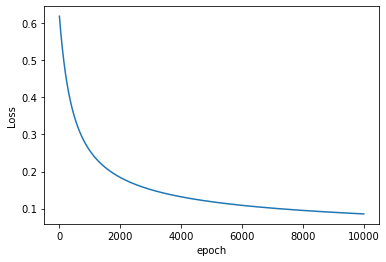

In [68]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

# visualize the training data


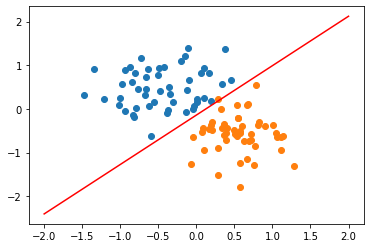

In [69]:
plot_fit('Trained Model')

Green point positve probabilit = 0.999263346195221
Green point in class 1
Black point positve probabilit = 0.00026677403366193175
Black point in class 0


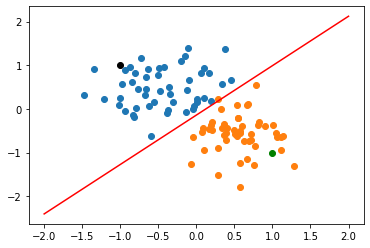

In [74]:
point1 = torch.Tensor([1.0, -1.0]) # two input x1 and x2
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("Green point positve probabilit = {}".format(model.forward(point1).item()))
print("Green point in class {}".format(model.predict(point1)))

print("Black point positve probabilit = {}".format(model.forward(point2).item()))
print("Black point in class {}".format(model.predict(point2)))

plot_fit('Trained Model')